In [21]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib.font_manager import FontProperties

path = '../dataset/Advertising.csv'  # # 手写读取数据
# f = file(path)
# x = []
# y = []
# for i, d in enumerate(f):
#     if i == 0:
#         continue
#     d = d.strip()
#     if not d:
#         continue
#     d = map(float, d.split(','))
#     x.append(d[1:-1])
#     y.append(d[-1])
# pprint(x)
# pprint(y)
# x = np.array(x)
# y = np.array(y)

# Python自带库
# f = file(path, 'r')
# print f
# d = csv.reader(f)
# for line in d:
#     print line
# f.close()

# # numpy读入
# p = np.loadtxt(path, delimiter=',', skiprows=1)
# print p
# print '\n\n===============\n\n'

In [22]:
# pandas读入
data = pd.read_csv(path)  # TV、Radio、Newspaper、Sales
# x = data[['TV', 'Radio', 'Newspaper']]
x = data[['TV', 'Radio']]
y = data['Sales']
print x
print y

        TV  Radio
0    230.1   37.8
1     44.5   39.3
2     17.2   45.9
3    151.5   41.3
4    180.8   10.8
5      8.7   48.9
6     57.5   32.8
7    120.2   19.6
8      8.6    2.1
9    199.8    2.6
10    66.1    5.8
11   214.7   24.0
12    23.8   35.1
13    97.5    7.6
14   204.1   32.9
15   195.4   47.7
16    67.8   36.6
17   281.4   39.6
18    69.2   20.5
19   147.3   23.9
20   218.4   27.7
21   237.4    5.1
22    13.2   15.9
23   228.3   16.9
24    62.3   12.6
25   262.9    3.5
26   142.9   29.3
27   240.1   16.7
28   248.8   27.1
29    70.6   16.0
..     ...    ...
170   50.0   11.6
171  164.5   20.9
172   19.6   20.1
173  168.4    7.1
174  222.4    3.4
175  276.9   48.9
176  248.4   30.2
177  170.2    7.8
178  276.7    2.3
179  165.6   10.0
180  156.6    2.6
181  218.5    5.4
182   56.2    5.7
183  287.6   43.0
184  253.8   21.3
185  205.0   45.1
186  139.5    2.1
187  191.1   28.7
188  286.0   13.9
189   18.7   12.1
190   39.5   41.1
191   75.5   10.8
192   17.2    4.1
193  166.8

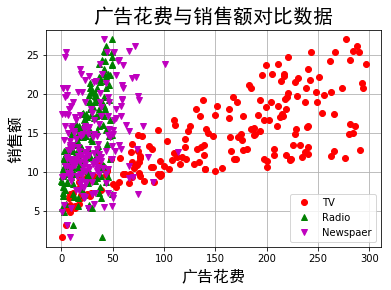

In [34]:
font_set = FontProperties(fname='../fonts/simhei.ttf', size=15)
fontproperties=font_set
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

# 绘制1
plt.figure(facecolor='w')
plt.plot(data['TV'], y, 'ro', label='TV')
plt.plot(data['Radio'], y, 'g^', label='Radio')
plt.plot(data['Newspaper'], y, 'mv', label='Newspaer')
plt.legend(loc='lower right')
plt.xlabel(u'广告花费', fontsize=16, fontproperties=fontproperties)
plt.ylabel(u'销售额', fontsize=16, fontproperties=fontproperties)
plt.title(u'广告花费与销售额对比数据', fontsize=20, fontproperties=fontproperties)
plt.grid()
plt.show()

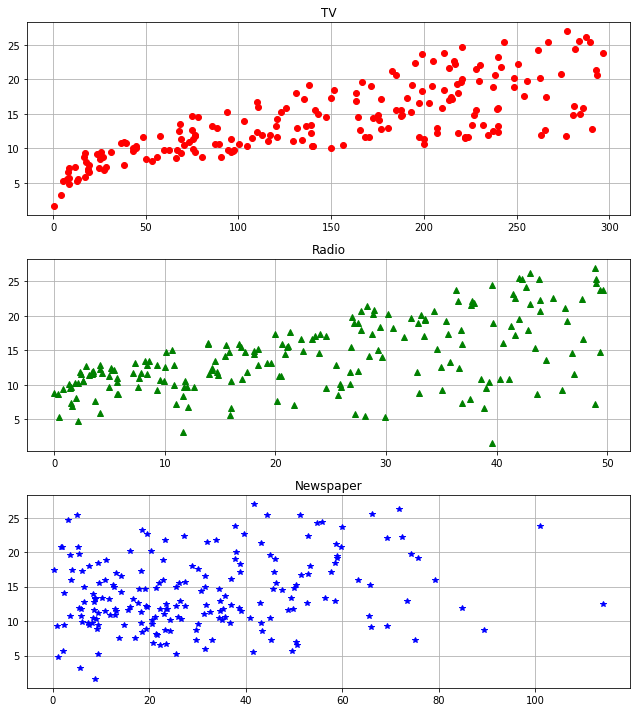

In [24]:
# 绘制2
plt.figure(facecolor='w', figsize=(9, 10))
plt.subplot(311)
plt.plot(data['TV'], y, 'ro')
plt.title('TV')
plt.grid()
plt.subplot(312)
plt.plot(data['Radio'], y, 'g^')
plt.title('Radio')
plt.grid()
plt.subplot(313)
plt.plot(data['Newspaper'], y, 'b*')
plt.title('Newspaper')
plt.grid()
plt.tight_layout()
plt.show()

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)
print type(x_test)
print x_train.shape, y_train.shape
linreg = LinearRegression()
model = linreg.fit(x_train, y_train)
print model
print linreg.coef_, linreg.intercept_

order = y_test.argsort(axis=0)
y_test = y_test.values[order]
x_test = x_test.values[order, :]
y_hat = linreg.predict(x_test)
mse = np.average((y_hat - np.array(y_test)) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print 'MSE = ', mse,
print 'RMSE = ', rmse
print 'R2 = ', linreg.score(x_train, y_train)
print 'R2 = ', linreg.score(x_test, y_test)

<class 'pandas.core.frame.DataFrame'>
(160, 2) (160,)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ 0.04686997  0.1800065 ] 2.94751503603
MSE =  1.95522188501 RMSE =  1.39829248908
R2 =  0.895852846878
R2 =  0.894734495003


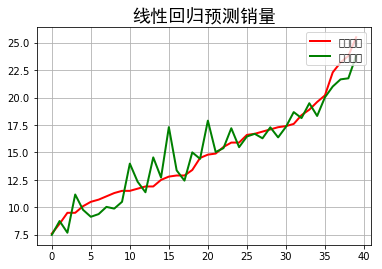

In [33]:
plt.figure(facecolor='w')
t = np.arange(len(x_test))
plt.plot(t, y_test, 'r-', linewidth=2, label=u'真实数据')
plt.plot(t, y_hat, 'g-', linewidth=2, label=u'预测数据')
plt.legend(loc='upper right')
plt.title(u'线性回归预测销量', fontsize=18, fontproperties=fontproperties)
plt.grid(b=True)
plt.show()

In [40]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split  # pandas读入

x = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
print x
print y

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
5      8.7   48.9       75.0
6     57.5   32.8       23.5
7    120.2   19.6       11.6
8      8.6    2.1        1.0
9    199.8    2.6       21.2
10    66.1    5.8       24.2
11   214.7   24.0        4.0
12    23.8   35.1       65.9
13    97.5    7.6        7.2
14   204.1   32.9       46.0
15   195.4   47.7       52.9
16    67.8   36.6      114.0
17   281.4   39.6       55.8
18    69.2   20.5       18.3
19   147.3   23.9       19.1
20   218.4   27.7       53.4
21   237.4    5.1       23.5
22    13.2   15.9       49.6
23   228.3   16.9       26.2
24    62.3   12.6       18.3
25   262.9    3.5       19.5
26   142.9   29.3       12.6
27   240.1   16.7       22.9
28   248.8   27.1       22.9
29    70.6   16.0       40.8
..     ...    ...        ...
170   50.0   11.6       18.4
171  164.5   20.9       47.4
172   19.6   2

alpha_can =  [   0.001         0.00359381    0.0129155     0.04641589    0.16681005
    0.59948425    2.15443469    7.74263683   27.82559402  100.        ]
超参数：
{'alpha': 0.001}
0.915621357512
1.97304571066 1.40465145522


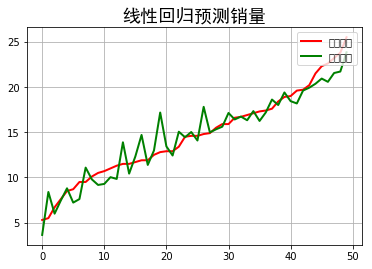

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
# model = Lasso()
model = Ridge()
alpha_can = np.logspace(-3, 2, 10)
np.set_printoptions(suppress=True)
print 'alpha_can = ', alpha_can
lasso_model = GridSearchCV(model, param_grid={'alpha': alpha_can}, cv=5)
lasso_model.fit(x_train, y_train)
print '超参数：\n', lasso_model.best_params_

order = y_test.argsort(axis=0)
y_test = y_test.values[order]
x_test = x_test.values[order, :]
y_hat = lasso_model.predict(x_test)
print lasso_model.score(x_test, y_test)
mse = np.average((y_hat - np.array(y_test)) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print mse, rmse

t = np.arange(len(x_test))
plt.figure(facecolor='w')
plt.plot(t, y_test, 'r-', linewidth=2, label=u'真实数据')
plt.plot(t, y_hat, 'g-', linewidth=2, label=u'预测数据')
plt.title(u'线性回归预测销量', fontsize=18, fontproperties=fontproperties)
plt.legend(loc='upper right')
plt.grid()
plt.show()

alpha_can =  [   0.001         0.00359381    0.0129155     0.04641589    0.16681005
    0.59948425    2.15443469    7.74263683   27.82559402  100.        ]
超参数：
{'alpha': 0.59948425031894093}
0.914773478474
1.99287186631 1.41169113701


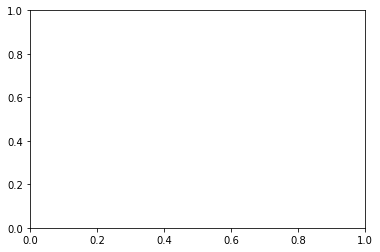

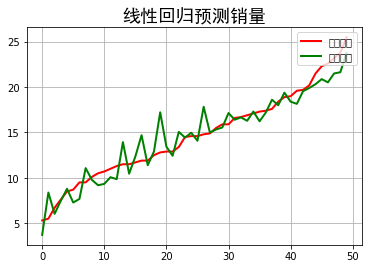

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
model = Lasso()
alpha_can = np.logspace(-3, 2, 10)
np.set_printoptions(suppress=True)
print 'alpha_can = ', alpha_can
lasso_model = GridSearchCV(model, param_grid={'alpha': alpha_can}, cv=5)
lasso_model.fit(x_train, y_train)
print '超参数：\n', lasso_model.best_params_

order = y_test.argsort(axis=0)
y_test = y_test.values[order]
x_test = x_test.values[order, :]
y_hat = lasso_model.predict(x_test)
print lasso_model.score(x_test, y_test)
mse = np.average((y_hat - np.array(y_test)) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print mse, rmse

t = np.arange(len(x_test))
plt.figure(facecolor='w')
plt.plot(t, y_test, 'r-', linewidth=2, label=u'真实数据')
plt.plot(t, y_hat, 'g-', linewidth=2, label=u'预测数据')
plt.title(u'线性回归预测销量', fontsize=18, fontproperties=fontproperties)
plt.legend(loc='upper right')
plt.grid()
plt.show()